In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
mydata = pd.read_csv("Competition_Data.csv")
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [46]:
print(mydata['Price'].min(), mydata['Price'].max())

47.7 310.66


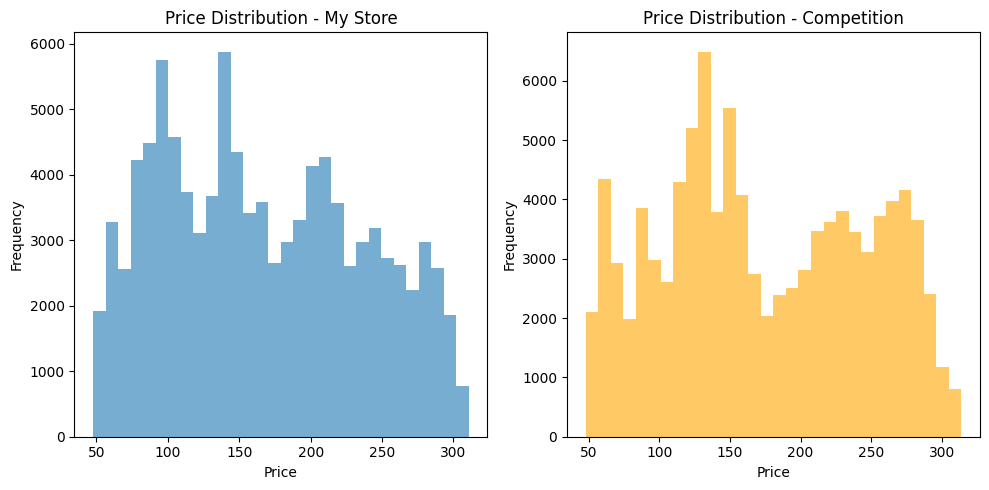

In [47]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(mydata['Price'], bins = 30, alpha = 0.6, label = 'My Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - My Store')

plt.subplot(1, 2, 2)
plt.hist(mydata['Competition_Price'], bins = 30, alpha = 0.6, color = 'orange', label = 'Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

>> Competition prices are at the higher side in general.

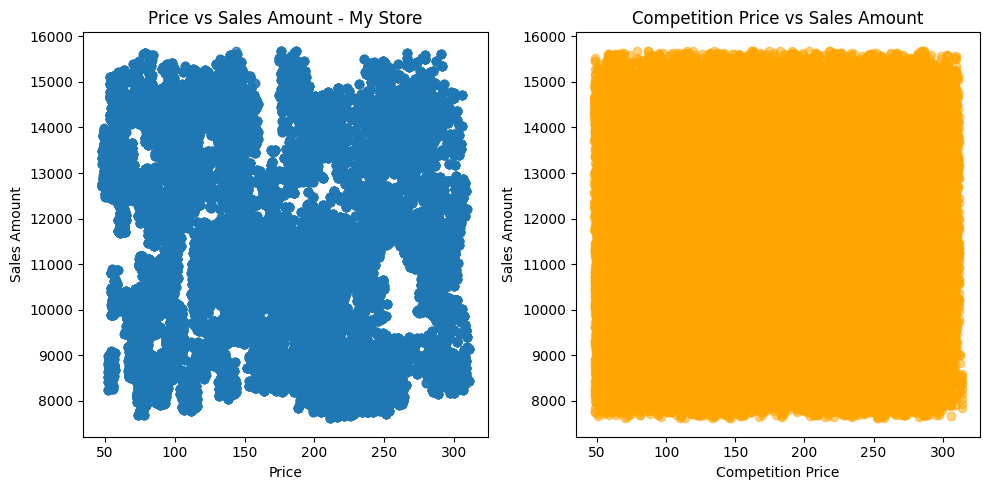

In [48]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(mydata['Price'], mydata['Sales_Amount'], alpha = 0.5, label = 'My Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - My Store')

plt.subplot(1, 2, 2)
plt.scatter(mydata['Competition_Price'], mydata['Sales_Amount'], alpha = 0.5, color = 'orange', label = 'Competition')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()
plt.show()

>> For my store, there's wide dispersion of sales amounts across various price points of the item, which indicates varied performance in different price ranges without a clear trend. In contrast, the competition store demonstrates a more consistent sales performance. It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.

In [64]:
mydata['Fiscal_Week_ID'] = pd.to_datetime(mydata['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

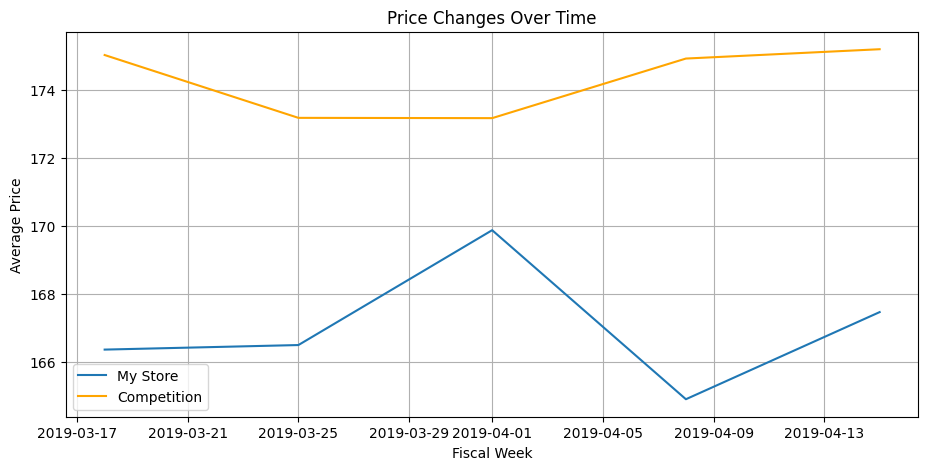

In [65]:
weekly_prices = mydata.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize = (11, 5))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label = 'My Store')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label = 'Competition', color = 'orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

>> It indicates that the competition follows a more stable pricing strategy, while my store experiences more pricing fluctuations.

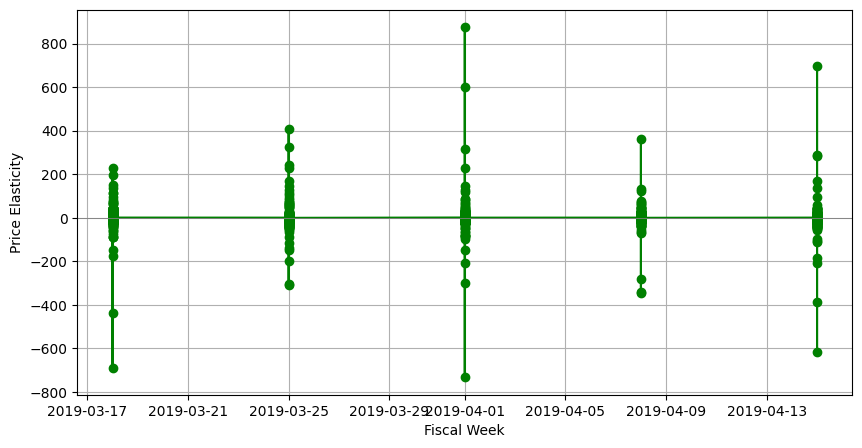

In [66]:
mydata['price_change'] = mydata['Price'].pct_change()
mydata['qty_change'] = mydata['Item_Quantity'].pct_change()

mydata['elasticity'] = mydata['qty_change'] / mydata['price_change']

mydata.replace([float('inf'), -float('inf')], float('nan'), inplace = True)
mydata.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize = (10, 5))
plt.plot(mydata['Fiscal_Week_ID'], mydata['elasticity'], marker = 'o', linestyle = '-', color = 'green')
plt.axhline(0, color = 'grey', linewidth = 0.6)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity')
#plt.title('')
plt.grid(True)
plt.show()

>> It indicates the sensitivity of quantity demanded to price changes fluctuates considerably. The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors such as promotions, seasonality, or market conditions, might be influencing demand.

In [52]:
total_sales_your_store = mydata['Sales_Amount'].sum()
total_sales_competition = (mydata['Competition_Price'] * mydata['Item_Quantity']).sum()

total_qty_your_store = mydata['Item_Quantity'].sum()
total_qty_competition = mydata['Item_Quantity'].sum()   #assuming quantities sold are the same for comparison

summary = pd.DataFrame({
    'Measure': ['Total Sales Amount', 'Total Quantity Sold'],
    'My Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})


summary.T

,0,1
Measure,Total Sales Amount,Total Quantity Sold
My Store,114100467.29,3984776.0
Competition,696209705.06,3984776.0


>> The competition has a significantly higher total sales amount compared to my store. It indicates that their pricing strategy is more effective in generating revenue, assuming the same number of items are sold in both the stores.

> We will analyze how the sales amounts vary across different price brackets to identify if there are specific price ranges where the competition outperforms my store.

In [67]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350']

mydata['price_bracket'] = pd.cut(mydata['Price'], bins = bins, labels = labels, right = False)
mydata['competition_price_bracket'] = pd.cut(mydata['Competition_Price'], bins = bins, labels = labels, right = False)

sales_by_bracket_my_store = mydata.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_my_store.columns = ['Price Bracket', 'My Store Sales Amount']

mydata['competition_sales_amt'] = mydata['Competition_Price'] * mydata['Item_Quantity']
sales_by_bracket_competition = mydata.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_my_store, sales_by_bracket_competition, on = 'Price Bracket')

sales_by_bracket

<ipython-input-67-b81718b26e2c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_my_store = mydata.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
<ipython-input-67-b81718b26e2c>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competition = mydata.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()


,Price Bracket,My Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07


>> The competition store has way higher sales than my store, irrespective of the price bracket.

In [68]:
# calculate average price and total quantity of item sold
item_summary = mydata.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

mydata = pd.merge(mydata, item_summary, on = 'Item_ID', suffixes = ('', '_avg'))

# define segments based on average price
mydata['segment'] = pd.cut(mydata['Price_avg'], bins = [50, 150, 250, 350], labels = ['Low', 'Medium', 'High'])

In [69]:
# calculate price elasticity for each segment
segments = mydata['segment'].unique()
elasticity_data = []
for segment in segments:
    segment_data = mydata[mydata['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    avg_price = segment_data['Price_avg'].mean()
    elasticity_data.append({'segment': segment, 'avg_price': avg_price, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)
elasticity_df

<ipython-input-69-1857680a43b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
<ipython-input-69-1857680a43b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
<ipython-input-69-1857680a43b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,segment,avg_price,avg_elasticity
0,Low,108.907081,0.154444
1,High,274.897344,0.930278
2,Medium,200.098960,-0.091442


>> We computed the average elasticity for each of the 3 segments namely, low, medium and high, which provides insights into how sensitive each segment is to price changes. This helps in understanding and optimizing pricing strategies for different customer segments. Segmentation is based on average price of the item bought by customers. The 'high' segment is most sensitive to price changes.

>> Low Segment (Relatively elastic): Relatively responsive to price changes.

>> Medium Segment (Inelastic Demand): Small changes in price do not significantly affect demand of this segment. We can increase prices to maximize revenue (without losing much in sales volume) as this segment is less responsive to price variations.

>> High Segment (Elastic Demand): Demand is sensitive to price changes. We should optimize prices to find the sweet spot that maximizes revenue without losing sales volume.

In [70]:
# create a copy of the dataset for simulation
dynamic_pricing_data = mydata.copy()

# apply dynamic pricing rules - adjust prices based on elasticity
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Low', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.2


# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = mydata['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = mydata['Item_Quantity'].sum()
#total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()                #quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    #'Measure': ['Total Sales Amount', 'Total Quantity Sold'],
    'Measure': ['Total Sales Amount'],
    #'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Existing Pricing': [total_sales_existing],
    'Dynamic Pricing': [total_sales_dynamic]
})

comparison_summary

,Measure,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,4.935458e+08


>> We simulated the impact of a dynamic pricing strategy on sales performance.

> The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue.

In [71]:
mydata['dynamic_price'] = dynamic_pricing_data['dynamic_price']
mydata.head(5)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Low,27.358
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Low,27.734
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Low,25.786
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Low,26.890
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Low,26.826
